# Lab Work 3 : Clustering / Analyzing Stock Movements

In [3]:
import numpy as np #tableau
import pandas as pd #visualisation
import matplotlib.pyplot as plt #data analysis library (pour les dataframes)

fn = 'data/company-stock-movements-2010-2015.csv'
stocks_df = pd.read_csv(fn, index_col=0)

In [4]:
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [5]:
#On récupère la liste des entreprises (en index)
companies = list(stocks_df.index)
movements = stocks_df.values #On récupère les données avec le ".values"
print(companies)

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']


In [6]:
companies.index('Sony'), companies.index('Canon')

(45, 7)

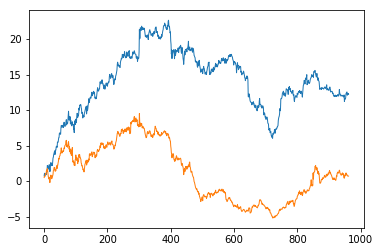

In [7]:
#On crée une liste pour les abscisses (allant de 0 à 962)
x = np.arange(movements.shape[1])

#On utilise la fonction cumsum() pour avoir la somme cumulée
sony  = movements[7].cumsum()
canon = movements[45].cumsum()

plt.plot(x, sony, linewidth=1)
plt.plot(x, canon, lw=1)

plt.show()

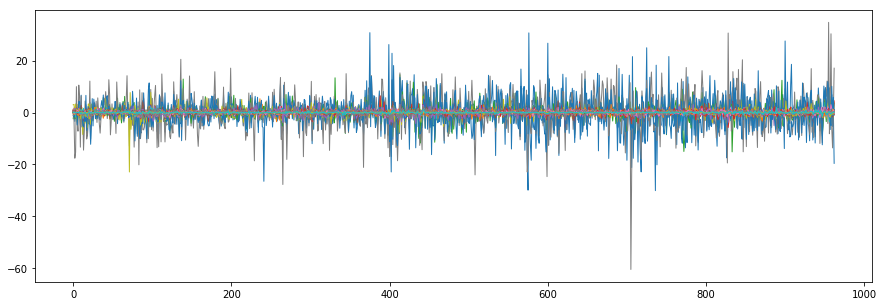

In [8]:
width = 15
height = 5
plt.figure(figsize=(width, height)) #figsize change la hauteur et la largeur de la fenêtre
plt.plot(np.arange(movements.shape[1]), np.transpose(movements), lw=1)
plt.show()

In [9]:
#On normalise les données et on récupère les labels 
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

normalizer = Normalizer()
kmeans = KMeans(n_clusters=20) #On demande 20 clusters
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements) #Train the model using the training sets
labels = pipeline.predict(movements)  #prédiction des labels pour les données fournies

In [10]:
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels') #On trie les compagnies par labels

,labels,companies
30,0,MasterCard
47,0,Symantec
31,0,McDonalds
13,0,DuPont de Nemours
32,0,3M
11,1,Cisco
21,1,Honda
58,1,Xerox
15,1,Ford
34,1,Mitsubishi


---
# Introdution to hierarchical clustering


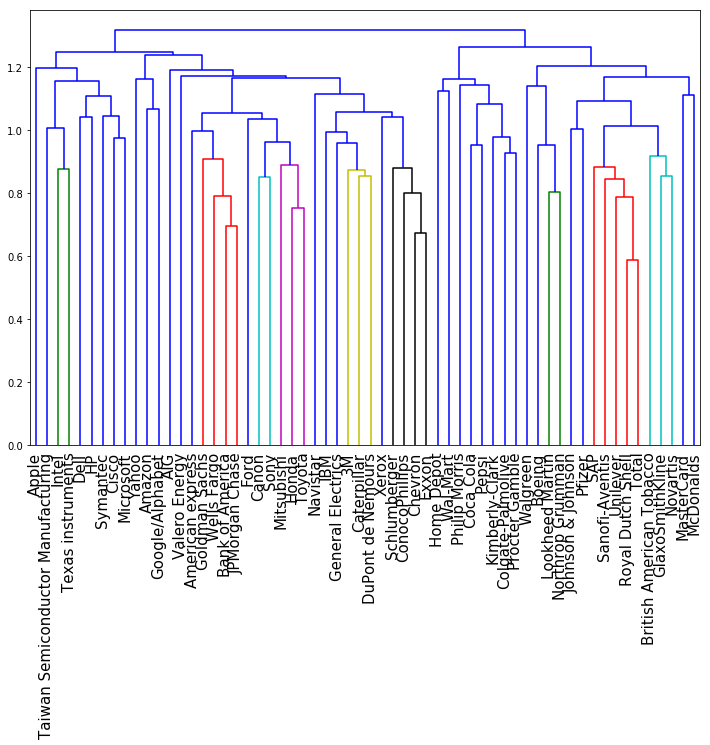

In [11]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

width = 12
height = 8
plt.figure(figsize=(width, height)) #figsize change la hauteur et la largeur de la fenêtre

normalized_movements = normalize(movements)
mergings = linkage(normalized_movements, method='complete')
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=15)
plt.show()

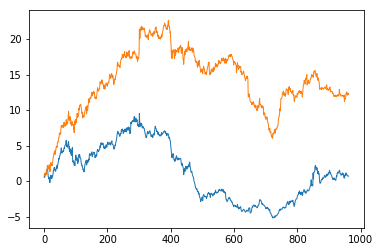

In [15]:
x = np.arange(movements.shape[1]) #x = tableau allant de 0 à 963 [0,1,2,3,4,...,962] - arange permet de créer un tableau régulier

sony  = movements[45].cumsum()
canon = movements[7].cumsum()

plt.plot(x, sony, lw=1)
plt.plot(x, canon, lw=1)

plt.show()

In [16]:
print(np.arange(963))
print(movements.shape)
print(movements.shape[1])
print(np.arange(movements.shape[1]))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24